In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

os.listdir(os.curdir)

['test.csv',
 'House_prices_torch (price_per_net)_v0.71.ipynb',
 '.ipynb_checkpoints',
 'train.csv']

In [3]:
raw_dt = pd.read_csv('./train.csv')
raw_dt

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
# constant_num = 10
# raw_dt = raw_dt.replace(['Ex', 'Gd', 'TA', 'Av', 'Fa', 'Mn','Po', 'No', 'NA'], [constant_num*2,  constant_num*1.5, 
#                                                                            constant_num, constant_num,
#                                                                             constant_num * 0.5,
#                                                                            constant_num*0.3, constant_num*0.1, 
#                                                                            0, 0])


# raw_dt = raw_dt.replace(['GLQ', 'ALQ' , 'BLQ', 'Rec', 'LwQ', 'Unf'], [constant_num*2,  constant_num*1.3, 
#                                                         constant_num*0.9, constant_num*0.7,
#                                                        constant_num*0.3, constant_num*0.05])

# raw_dt['Street'] = raw_dt['Street'].replace(['Grvl', 'Pave'], [constant_num*0.7, constant_num*2])
# raw_dt['Alley'] = raw_dt['Alley'].replace(['Grvl', 'Pave'], [constant_num*0.7, constant_num*2 ])
# raw_dt['LotShape'] = raw_dt['LotShape'].replace(['Reg', 'IR1', 'IR2' , 'IR3'], [constant_num*5,constant_num*2, constant_num, constant_num*0.8 ])
# raw_dt['LandContour'] = raw_dt['LandContour'].replace(['Lvl', 'Bnk', 'HLS', 'Low'], [constant_num*5,constant_num*1.5, constant_num*0.8, constant_num*0.4])
# raw_dt['Utilities'] = raw_dt['Utilities'].replace(['AllPub', 'NoSewr', 'NoSeWa', 'ELO'], [constant_num*3, constant_num*2.3, constant_num*1.5, constant_num])
# raw_dt['LotConfig'] = raw_dt['LotConfig'].replace(['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'], [constant_num*1.5, constant_num*2, constant_num,
#                                                                                                  constant_num*3, constant_num*4])
# raw_dt['LandSlope'] = raw_dt['LandSlope'].replace(['Gtl', 'Mod', 'Sev'], [constant_num*1.5, constant_num*0.9, constant_num*0.3 ])
# raw_dt['RoofStyle'] = raw_dt['RoofStyle'].replace(['', ''], [constant_num,constant_num ])
# raw_dt['MSZoning'] = raw_dt['MSZoning'].replace(['A', 'C',  'C (all)', 'FV', 'I', 'RH','RL', 'RP', 'RM'], [constant_num*1.2, constant_num*1.5, constant_num*2, constant_num*1.1, constant_num*0.5,
#                                                                              constant_num*0.8, constant_num, constant_num*0.5, constant_num*0.9])
# raw_dt['BldgType'] = raw_dt['BldgType'].replace(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE' ,'TwnhsI'], [constant_num*3, constant_num*1.5, 
#                                                                                                   constant_num*1.1, constant_num*0.9,
#                                                                                                   constant_num*0.8, constant_num*0.7 ])
# # raw_dt[''] = raw_dt[''].replace(['', ''], [constant_num,constant_num ])



# raw_dt['CentralAir'] = raw_dt['CentralAir'].replace(['N', 'Y'], [0, 1])
# raw_dt['GarageType'] = raw_dt['GarageType'].replace(['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd'], [constant_num*2, constant_num*1.6,
#                                                                                                                      constant_num*1.3, constant_num*1.2,
#                                                                                                                      constant_num*1.1, constant_num*0.9])

# raw_dt['GarageFinish'] = raw_dt['GarageFinish'].replace(['Fin', 'RFn', 'Unf'], [constant_num*1.6, constant_num*1.3, constant_num*0.8])
# raw_dt['PavedDrive'] = raw_dt['PavedDrive'].replace(['Y', 'P', 'N'], [constant_num*1.7, constant_num*1.3, constant_num*0.95])
# raw_dt['Fence'] = raw_dt['Fence'].replace(['GdPrv', 'MnPrv', 'GdWo', 'MnWw'], [constant_num*2, constant_num*1.5, constant_num*1.2, constant_num*0.8])
# raw_dt['MiscFeature'] = raw_dt['MiscFeature'].replace(['Elev', 'Gar2', 'Othr', 'Shed', 'TenC'], [constant_num*1.5, constant_num*1.8, constant_num*1.3
#                                                                                                  ,constant_num*1.4,constant_num*1.9])

In [5]:
# raw_dt['price_per_lot'] = raw_dt['SalePrice'] / raw_dt['LotArea']
raw_dt['net_area'] = ((raw_dt['1stFlrSF'] + raw_dt['2ndFlrSF']) - raw_dt['LowQualFinSF']) 
+ raw_dt['GrLivArea'] + raw_dt['GarageArea'] + raw_dt['PoolArea'] 

raw_dt['price_per_net'] = raw_dt['SalePrice'] / raw_dt['net_area']
# raw_dt['price_per_net'] = raw_dt['SalePrice'] / raw_dt['net_area']
raw_dt

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,net_area,price_per_net
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,1710,121.929825
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,1262,143.819334
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,1786,125.139978
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,1717,81.537566
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,2198,113.739763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,175000,1647,106.253795
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,2,2010,WD,Normal,210000,2073,101.302460
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,GdPrv,Shed,2500,5,2010,WD,Normal,266500,2340,113.888889
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2010,WD,Normal,142125,1078,131.841373


In [6]:
raw_dt2 = raw_dt[['Id', 'SalePrice']]
raw_dt2

,Id,SalePrice
0,1,208500
1,2,181500
2,3,223500
3,4,140000
4,5,250000
...,...,...
1455,1456,175000
1456,1457,210000
1457,1458,266500
1458,1459,142125


In [7]:
raw_dt[['LotArea', 'net_area']]

,LotArea,net_area
0,8450,1710
1,9600,1262
2,11250,1786
3,9550,1717
4,14260,2198
...,...,...
1455,7917,1647
1456,13175,2073
1457,9042,2340
1458,9717,1078


In [8]:
raw_dt = raw_dt.fillna(0)

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

raw_dt_num = raw_dt.select_dtypes(include=numerics)
raw_dt_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,net_area,price_per_net
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,2,2008,208500,1710,121.929825
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,5,2007,181500,1262,143.819334
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,0,9,2008,223500,1786,125.139978
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,272,0,0,0,0,2,2006,140000,1717,81.537566
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,0,12,2008,250000,2198,113.739763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,0,0,8,2007,175000,1647,106.253795
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,0,2,2010,210000,2073,101.302460
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,0,2500,5,2010,266500,2340,113.888889
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,112,0,0,0,0,4,2010,142125,1078,131.841373


In [10]:
numerics = ['object']

raw_dt_str = raw_dt.select_dtypes(include=numerics)
raw_dt_str

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
1,RL,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
2,RL,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
3,RL,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,0,0,0,WD,Abnorml
4,RL,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
1456,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,0,MnPrv,0,WD,Normal
1457,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,0,GdPrv,Shed,WD,Normal
1458,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,0,0,0,WD,Normal


In [11]:
raw_dt_num2 = pd.get_dummies(data = raw_dt_str, columns=raw_dt_str.columns)
raw_dt_num2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 268 entries, MSZoning_C (all) to SaleCondition_Partial
dtypes: uint8(268)
memory usage: 382.2 KB


In [12]:
raw_dt_num = pd.concat([raw_dt_num, raw_dt_num2], axis = 1)
raw_dt_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [13]:
test = pd.read_csv('./test.csv')

# test['price_per_lot'] = test['SalePrice'] / test['LotArea']
test['net_area'] = ((test['1stFlrSF'] + test['2ndFlrSF']) - test['LowQualFinSF']) + test['GrLivArea'] + test['GarageArea'] + test['PoolArea']

test = test.fillna(0)

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

test_num = test.select_dtypes(include=numerics)

numerics = ['object']

test_str = test.select_dtypes(include=numerics)

test_num2 = pd.get_dummies(data = test_str, columns=test_str.columns)
test_num = pd.concat([test_num, test_num2], axis = 1)
test_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


In [14]:
dual_col_list = raw_dt_num.columns[raw_dt_num.columns.isin(test_num.columns)]
len(dual_col_list)

287

In [15]:
raw_dt_num = raw_dt_num[dual_col_list]
raw_dt_num = pd.merge(raw_dt_num, raw_dt2, on =['Id'], how = 'inner')
raw_dt_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,1,0,0,0,0,1,0,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,1,0,0,0,0,1,0,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,1,0,0,0,0,1,0,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,1,1,0,0,0,0,0,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,1,0,0,0,0,1,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,1,0,0,0,0,1,0,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,1,0,0,0,0,1,0,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,1,0,0,0,0,1,0,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,1,0,0,0,0,1,0,142125


In [16]:
drop_list = ['BsmtQual_0', 'Exterior1st_AsphShn', 'Utilities_AllPub',
       'Condition2_Artery', 'RoofStyle_Shed', 'BsmtCond_0',
       'MiscFeature_Othr', 'FireplaceQu_0', 'HeatingQC_Po',
       'Condition2_PosA', 'GarageType_0', 'GarageQual_0',
       'MiscFeature_Gar2', 'Exterior2nd_CBlock', 'GarageQual_Po',
       'CentralAir_Y', 'GarageCond_0', 'Street_Pave', 'Functional_Sev',
       'BsmtFinType1_0', 'Condition1_RRNe', 'GarageFinish_0',
       'BsmtCond_Po', 'PoolQC_0', 'PoolQC_Ex', 'ExterCond_Po',
       'Exterior1st_CBlock', 'Neighborhood_Blueste',
       'Exterior1st_BrkComm', 'Condition2_PosN', 'Foundation_Wood', 'SaleType_ConLI',
       'BsmtExposure_0', 'BsmtFinType2_0', 'Heating_Grav',
       'Electrical_FuseP', 'Street_Grvl']

In [17]:
raw_dt_num = raw_dt_num.drop(columns=drop_list)

In [19]:
train_data = raw_dt_num.drop(columns=['Id', 'SalePrice'])
train_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [20]:
price_data = pd.DataFrame(raw_dt_num['SalePrice'], columns = ['SalePrice'])
price_data

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [21]:
import xgboost
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import numpy as np
import math

In [22]:
min_max_scaler1  = MinMaxScaler()

min_max_scaler1.fit(train_data)

train_data_scaled = min_max_scaler1.fit_transform(train_data)
train_data_scaled = pd.DataFrame(train_data_scaled, columns = train_data.columns)
train_data_scaled

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.207668,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.255591,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.217252,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.191693,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.268371,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.198083,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.000000,0.271565,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.294118,0.210863,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.000000,0.217252,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.698100,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
min_max_scaler2  = MinMaxScaler()
min_max_scaler2.fit(price_data)

price_data_scaled = min_max_scaler2.fit_transform(price_data)
price_data_scaled = pd.DataFrame(price_data_scaled, columns =['price_per_lot' + '_scaled'])
price_data_scaled

,price_per_lot_scaled
0,0.241078
1,0.203583
2,0.261908
3,0.145952
4,0.298709
...,...
1455,0.194556
1456,0.243161
1457,0.321622
1458,0.148903


In [24]:
numeric_x_df = pd.DataFrame(train_data_scaled, columns = train_data_scaled.columns)
numeric_x = torch.tensor(numeric_x_df.values, dtype = torch.float)

numeric_y_df = pd.DataFrame(price_data_scaled, columns = price_data_scaled.columns)
numeric_y = torch.tensor(numeric_y_df.values, dtype = torch.float)
# raw_dt['SalePrice']

In [25]:
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, H3, H4, H5, H6, H7,D_out):
#     def __init__(self, D_in, H1, H2, H3, H4, H5, H6, H7, H8, H9, H10, H11, H12, H13, H14, H15, H16, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.dropout1 = nn.Dropout(0.3)
        self.linear2 = nn.Linear(H1, H2)
        self.dropout2 = nn.Dropout(0.3)
        self.linear3 = nn.Linear(H2, H3)
        self.dropout3 = nn.Dropout(0.3)
        self.linear4 = nn.Linear(H3, H4)
        self.dropout4 = nn.Dropout(0.5)
        self.linear5 = nn.Linear(H4, H5)
        self.dropout5 = nn.Dropout(0.5)
        self.linear6 = nn.Linear(H5, H6)
        self.dropout6 = nn.Dropout(0.5)
        self.linear7 = nn.Linear(H6, H7)
        self.dropout7 = nn.Dropout(0.3)
#         self.linear8 = nn.Linear(H7, H8)
#         self.dropout8 = nn.Dropout(0.4)
#         self.linear9 = nn.Linear(H8, H9)
#         self.dropout9 = nn.Dropout(0.4)
#         self.linear10 = nn.Linear(H9, H10)
#         self.dropout10 = nn.Dropout(0.5)
#         self.linear11 = nn.Linear(H10, H11)
#         self.dropout11 = nn.Dropout(0.5)
#         self.linear12 = nn.Linear(H11, H12)
#         self.dropout12 = nn.Dropout(0.4)
#         self.linear13 = nn.Linear(H12, H13)
#         self.dropout13 = nn.Dropout(0.4)
#         self.linear14 = nn.Linear(H13, H14)
#         self.dropout14 = nn.Dropout(0.3)
#         self.linear15 = nn.Linear(H14, H15)
#         self.dropout15 = nn.Dropout(0.2)
#         self.linear16 = nn.Linear(H15, H16)
#         self.dropout16 = nn.Dropout(0.1)
        self.linear17 = nn.Linear(H7, D_out)
        
    def forward(self, x):
        y_pred = self.linear1(x).clamp(min=0)
        y_pred = F.relu(y_pred)
        y_pred = self.dropout1(y_pred)
        y_pred = self.linear2(y_pred).clamp(min=0)
        y_pred = F.relu(y_pred)
        y_pred = self.dropout2(y_pred)
        y_pred = self.linear3(y_pred).clamp(min=0)                 
        y_pred = F.relu(y_pred)
        y_pred = self.dropout3(y_pred)
        y_pred = self.linear4(y_pred).clamp(min=0)
        y_pred = F.relu(y_pred)
        y_pred = self.dropout4(y_pred)                
        y_pred = self.linear5(y_pred).clamp(min=0)               
        y_pred = F.relu(y_pred)
        y_pred = self.dropout5(y_pred) 
        y_pred = self.linear6(y_pred).clamp(min=0)                
        y_pred = F.relu(y_pred)
        y_pred = self.dropout6(y_pred)
        y_pred = self.linear7(y_pred).clamp(min=0)
        y_pred = F.relu(y_pred)
        y_pred = self.dropout7(y_pred)
#         y_pred = self.linear8(y_pred).clamp(min=0)
#         y_pred = F.relu(y_pred)
#         y_pred = self.dropout8(y_pred)
#         y_pred = self.linear9(y_pred).clamp(min=0)
#         y_pred = F.relu(y_pred)
#         y_pred = self.dropout9(y_pred)
#         y_pred = self.linear10(y_pred).clamp(min=0)
#         y_pred = F.relu(y_pred)
#         y_pred = self.dropout10(y_pred)
#         y_pred = self.linear11(y_pred).clamp(min=0)
#         y_pred = F.relu(y_pred)
#         y_pred = self.dropout11(y_pred)
#         y_pred = self.linear12(y_pred).clamp(min=0)
#         y_pred = F.relu(y_pred)
#         y_pred = self.dropout2(y_pred)
#         y_pred = self.linear13(y_pred).clamp(min=0)
#         y_pred = F.relu(y_pred)
#         y_pred = self.dropout13(y_pred)
#         y_pred = self.linear14(y_pred).clamp(min=0)
#         y_pred = F.relu(y_pred)
#         y_pred = self.dropout14(y_pred)
#         y_pred = self.linear15(y_pred).clamp(min=0)
#         y_pred = F.relu(y_pred)                
#         y_pred = self.dropout15(y_pred)
#         y_pred = self.linear16(y_pred).clamp(min=0)
#         y_pred = F.relu(y_pred)
#         y_pred = self.dropout16(y_pred)
        y_pred = self.linear17(y_pred)
        y_pred = F.relu(y_pred)
        return y_pred

In [26]:
numeric_x.shape

torch.Size([1460, 249])

In [27]:
numeric_y.shape

torch.Size([1460, 1])

In [28]:
H1 = 500
H2 = 700
H3 = 900
H4 = 1000
H5 = 800
H6 = 600
H7 = 400
# H8 = 800
# H9 = 800
# H10 = 800
# H11 = 800
# H12 = 800
# H13 = 800
# H14 = 800
# H15 = 800
# H16 = 800

D_in = numeric_x.shape[1]
D_out = numeric_y.shape[1]

In [29]:
# model1 = Net(D_in, H1, H2, H3,H4, H5,H6, H7, H8, H9, H10, H11, H12, H13, H14, H15, H16, D_out)
model1 = Net(D_in, H1, H2, H3,H4, H5,H6, H7, D_out)
criterion = nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.Adam(model1.parameters(), lr = 0.0001)

model1.train()
losses1 = []
for t in range(200000):
    y_pred = model1(numeric_x)
    
    loss = criterion(y_pred, numeric_y)
    if t % 10000 == 0:
        print(t, loss.item())
    losses1.append(loss.item())
    
#     if torch.isnan(loss):
#         break
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 77.74312591552734
10000 0.1513916552066803
20000 0.10655173659324646
30000 0.10487182438373566
40000 0.06707001477479935
50000 0.06953771412372589
60000 0.06313886493444443
70000 0.06514474749565125
80000 0.0574677437543869
90000 0.059299249202013016
100000 0.05600583553314209
110000 0.048885785043239594
120000 0.05262450873851776
130000 0.04562614485621452
140000 0.05171620100736618
150000 0.050260357558727264
160000 0.0514833964407444
170000 0.05427728593349457
180000 0.05097268521785736
190000 0.058453865349292755


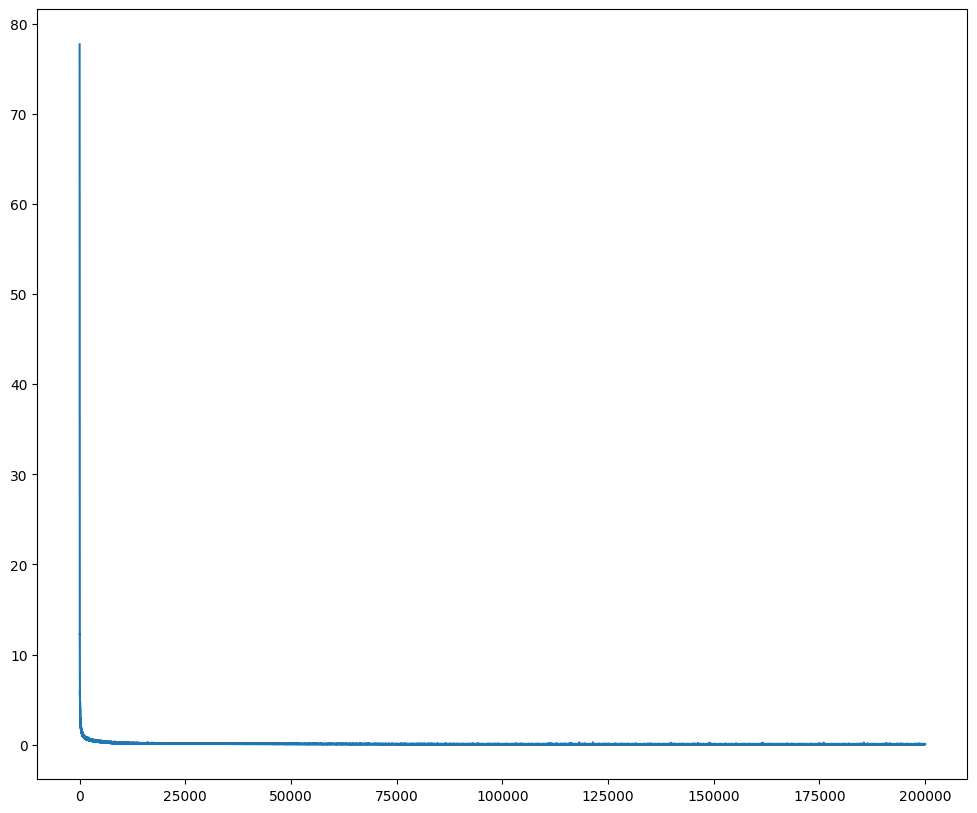

In [30]:
plt.figure(figsize=(12, 10))
plt.plot(range(len(losses1)), losses1)
plt.show()

In [31]:
model1.eval()
train_result = model1(numeric_x)
train_result

tensor([[0.2418],
        [0.2032],
        [0.2624],
        ...,
        [0.3216],
        [0.1492],
        [0.1565]], grad_fn=<ReluBackward0>)

In [32]:
predict_result_price0 = pd.DataFrame(train_result.data.numpy(), columns = ['predict_price_per_size'])
predict_result_price0 = min_max_scaler2.inverse_transform(predict_result_price0)
predict_result_price0 = pd.DataFrame(predict_result_price0, columns = ['predict_price_per_size'])
predict_result_price0

,predict_price_per_size
0,208993.875000
1,181189.500000
2,223818.953125
3,140043.875000
4,250074.453125
...,...
1455,175049.437500
1456,210446.218750
1457,266491.718750
1458,142364.859375


In [33]:
result_price0 = pd.concat([raw_dt, predict_result_price0], axis = 1)
result_price0

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,net_area,price_per_net,predict_price_per_size
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,2,2008,WD,Normal,208500,1710,121.929825,208993.875000
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,5,2007,WD,Normal,181500,1262,143.819334,181189.500000
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,9,2008,WD,Normal,223500,1786,125.139978,223818.953125
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,2,2006,WD,Abnorml,140000,1717,81.537566,140043.875000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,12,2008,WD,Normal,250000,2198,113.739763,250074.453125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,...,0,0,8,2007,WD,Normal,175000,1647,106.253795,175049.437500
1456,1457,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,...,0,0,2,2010,WD,Normal,210000,2073,101.302460,210446.218750
1457,1458,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,...,Shed,2500,5,2010,WD,Normal,266500,2340,113.888889,266491.718750
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0,0,4,2010,WD,Normal,142125,1078,131.841373,142364.859375


In [35]:
train_data_scaled["predict_price"] = result_price0['predict_price_per_size']
train_data_scaled["100-MAPE"] = 100 - ((abs(result_price0['SalePrice']- result_price0["predict_price_per_size"]) / result_price0['SalePrice']) * 100)
train_data_scaled["100-MAPE"].mean()

99.42185931894

In [39]:
test = pd.read_csv('./test.csv')

test['net_area'] = ((test['1stFlrSF'] + test['2ndFlrSF']) - test['LowQualFinSF']) + test['GrLivArea'] + test['GarageArea'] + test['PoolArea']
                                                                              # ,constant_num*1.4,constant_num*1.9])

test = test.fillna(0)

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

test_num = test.select_dtypes(include=numerics)

numerics = ['object']

test_str = test.select_dtypes(include=numerics)

test_num2 = pd.get_dummies(data = test_str, columns=test_str.columns)
test_num = pd.concat([test_num, test_num2], axis = 1)

add_dummy_col = np.setdiff1d(np.array(raw_dt_num.columns), np.array(test_num.columns))
# add_dummy_col = np.delete(add_dummy_col, ['SalePrice','price_per_net'])


for i in add_dummy_col[:-2]:
    test_num[i] = 0

train_data_scaled = train_data_scaled.drop(columns=['predict_price', '100-MAPE'])

# test_data = test_num.drop(columns=['Id'])
test_data = test_num[train_data_scaled.columns]


test_data_scaled = min_max_scaler1.fit_transform(test_data)
test_data_scaled = pd.DataFrame(test_data_scaled, columns = test_data.columns)


model1.eval()
test_y = model1(torch.tensor(test_data_scaled.values, dtype = torch.float))

predict_result_price1 = pd.DataFrame(test_y.data.numpy(), columns = ['predict_price_per_size'])
predict_result_price1 = min_max_scaler2.inverse_transform(predict_result_price1)
predict_result_price1 = pd.DataFrame(predict_result_price1, columns = ['predict_price_per_size'])


test_data = pd.concat([test_data, predict_result_price1], axis = 1)
test_data['SalePrice'] = test_data['predict_price_per_size']


test_data = pd.concat([test_data, test['Id']], axis = 1)


result = test_data[['Id', 'SalePrice']]
# result = result.rename(columns={'predicted_SalePrice' : 'SalePrice'})
result.to_csv('./Submission_0526_torch.csv', index = False, encoding = 'utf-8')

In [23]:
param_test2 = {'learning_rate' : [0.1],
               'n_estimators' : [2000, 3000, 5000,7000],
               'max_depth' : [70, 50, 30, 20],
               'objective' : ['reg:squaredlogerror'],
                # 'min_child_weight':[3,5],
               # 'colsample_bytree':[0.5,0.8],
                 # 'colsample_bylevel':[0.3,0.9],
               # 'gamma':[0,1,3],
                'rate_drop' : [0.1]
              # 'subsample' : [0.3, 0.5 , 0.8]
              }

# param_test2 = {'learning_rate' : [0.18, 0.19],
#                'max_depth' : [10, 20, 30],
#                'rate_drop' : [0.1, 0.2],
#                'n_estimators' : [5000, 3000]
#               }
 
kf = KFold(n_splits=3)

gsearch2 = GridSearchCV(estimator = xgboost.XGBRegressor(
                                                  min_child_weight=1, 
                                                  gamma=0, 
                                                  colsample_bytree=0.8,
                                                  # objective= 'reg:squaredlogerror', 
                                                  scale_pos_weight=1,
                                                  sample_type = 'uniform',
                                                  # max_features = 'auto',
#                                                   rate_drop = 0.1,
                                                  booster = 'dart'), # gbtree, gblinear , dart
                        param_grid = param_test2, n_jobs=8, scoring = 'neg_root_mean_squared_error' ,cv=kf, verbose=10, refit=True)
                        # param_grid = param_test2, scoring='neg_mean_squared_error', n_jobs=10, cv=kf, verbose=10)

# gsearch2.fit(X_train, y_train)
gsearch2.fit(train_data_scaled, price_data_scaled)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


({'mean_fit_time': array([35804.37162224, 35896.2321442 , 61658.47435141, 58206.92691255,
         29412.91054781, 30565.89581315, 60077.62942076, 60129.67739065,
         30922.0731043 , 30751.40867901, 64124.06607914, 64295.52648433,
         32477.47376156, 30263.96280909, 59010.54216997, 59657.85243607,
         30424.38466318, 30877.52403816, 59999.09695061, 60057.00410183,
         30589.58116523, 30752.04852414, 48779.56696177, 47890.75871356]),
  'std_fit_time': array([ 108.10199316,   78.21389742, 2632.39118854,  130.3005113 ,
          500.38612696,  137.33608322,   70.26731074,  139.38226511,
         1464.79318937, 1229.24432624,  118.21801188,  122.35059986,
         1677.76547582,   58.19013045,   38.7625943 ,  222.96178398,
          202.00173673,  100.67398301,   67.60768381,   40.86930683,
           16.62604419,    5.56146985,   60.08562314,  486.1442734 ]),
  'mean_score_time': array([ 84.25347606,  84.23584421, 123.41218837, 146.70495462,
          89.17021394, 102.

In [24]:
gsearch2.best_params_

{'learning_rate': 0.1,
 'max_depth': 70,
 'n_estimators': 7000,
 'objective': 'reg:squarederror',
 'rate_drop': 0.1}

In [ ]:
# gsearch2.best_params_
# {'learning_rate': 0.1, 'max_depth': 30, 'n_estimators': 8000, 'rate_drop': 0.1}
# {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 7000, 'rate_drop': 0.1}

In [ ]:
xgb_model = xgboost.XGBRegressor(n_estimators=7000, 
                                 learning_rate=0.1,
                                 rate_drop=0.1,
                                 max_depth =  70,
                                  subsample = 0.5,
                                sample_type = 'uniform',
                                objective= 'reg:squaredlogerror',
                                booster = 'dart')
# xgb_model.fit(res_dt.drop(columns=["rent_per_size"]), res_dt["rent_per_size"])
xgb_model.fit(train_data_scaled, price_data_scaled)

In [ ]:
imp = (xgb_model.feature_importances_)


res_ft = pd.DataFrame({'col_nm' : train_data_scaled.columns.values, 'feature_importance' : imp})
res_ft = res_ft.sort_values(by=["feature_importance"], ascending = False)
res_ft

In [ ]:
# drop_list = res_ft[res_ft['feature_importance'] == 0]['col_nm'].values
# drop_list

In [ ]:
# res_dt = res_dt.drop(columns=["predict_RDF_price_per_size", "100-MAPE_RDF"])
train_data_scaled["predict_xgb_price_per_size"] = xgb_model.predict(train_data_scaled)
train_data_scaled["100-MAPE"] = 100 - ((abs(price_data_scaled[price_data_scaled.columns[0]] - train_data_scaled["predict_xgb_price_per_size"]) / price_data_scaled[price_data_scaled.columns[0]]) * 100)
train_data_scaled["100-MAPE"].mean()

In [ ]:
train_data_scaled[train_data_scaled["100-MAPE"] > 0]["100-MAPE"].mean()

In [22]:
len(drop_list)

NameError: name 'drop_list' is not defined

In [ ]:
train_data_scaled_d1 = train_data_scaled.drop(columns=drop_list)

In [93]:
param_test2 = {'learning_rate' : [0.2],
               'n_estimators' : [3000, 5000, 7000],
               'max_depth' : [20, 30, 40, 50],
                # 'min_child_weight':[3,5],
               # 'colsample_bytree':[0.5,0.8],
                 # 'colsample_bylevel':[0.3,0.9],
               # 'gamma':[0,1,3],
                'rate_drop' : [0.1, 0.2]
              # 'subsample' : [0.3, 0.5 , 0.8]
              }

# param_test2 = {'learning_rate' : [0.18, 0.19],
#                'max_depth' : [10, 20, 30],
#                'rate_drop' : [0.1, 0.2],
#                'n_estimators' : [5000, 3000]
#               }
 
kf = KFold(n_splits=2)

gsearch2 = GridSearchCV(estimator = xgboost.XGBRegressor(
                                                  # min_child_weight=1, 
                                                  # gamma=0, 
                                                  # colsample_bytree=0.8,
                                                  objective= 'reg:squaredlogerror', 
                                                  scale_pos_weight=1,
                                                  sample_type = 'uniform',
                                                  max_features = 'auto',
#                                                   rate_drop = 0.1,
                                                  booster = 'dart'), # gbtree, gblinear , dart
                        param_grid = param_test2, n_jobs=6, scoring = 'neg_root_mean_squared_error' ,cv=kf, verbose=10, refit=True)
                        # param_grid = param_test2, scoring='neg_mean_squared_error', n_jobs=10, cv=kf, verbose=10)

# gsearch2.fit(X_train, y_train)
gsearch2.fit(train_data_scaled_d1, price_data_scaled)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[21:16:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "max_features" } are not used.



({'mean_fit_time': array([ 5219.10191023,  4638.20315516, 13907.82437098, 12258.36359489,
         29414.70964432, 26636.02314603,  5660.54974377,  5523.0187732 ,
         14807.92699301, 12449.51818264, 26598.03372931, 23502.83050406,
          5017.151963  ,  4345.34420168, 13528.7414639 , 11924.60852647,
         27617.06532729, 24617.79904997,  4905.95486677,  5369.41923928,
         14237.9516418 , 13654.61289024, 28801.19448674, 23797.57620585]),
  'std_fit_time': array([ 22.90348446,  16.85066354,  40.34593904,  37.33556235,
         116.70045042,  82.8329519 ,  23.50512135,  55.63561857,
          31.02453697,  59.48080552, 102.23458195,  17.26199663,
          15.00773883,  16.70255411,  32.24768066,   4.78374267,
          60.18288958,  32.76897609,  74.08762729,   8.95000386,
          67.68789721,  64.10463428,   7.46238792, 111.08455789]),
  'mean_score_time': array([ 49.46363294,  42.4259876 ,  89.36092734,  71.32368314,
         110.92334306, 107.93972003,  44.96102607, 

In [94]:
gsearch2.best_params_

{'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 7000, 'rate_drop': 0.1}

In [18]:
xgb_model = xgboost.XGBRegressor(n_estimators=7000, 
                                 learning_rate=0.1,
                                 rate_drop=0.1,
                                 max_depth =  20,
                                  subsample = 0.5,
                                sample_type = 'uniform',
                                objective= 'reg:squaredlogerror',
                                booster = 'dart')
# xgb_model.fit(res_dt.drop(columns=["rent_per_size"]), res_dt["rent_per_size"])
xgb_model.fit(train_data_scaled, price_data_scaled)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=7000, n_jobs=None, num_parallel_tree=None,
             objective='reg:squaredlogerror', predictor=None, ...)

In [19]:
imp = (xgb_model.feature_importances_)


res_ft = pd.DataFrame({'col_nm' : train_data_scaled.columns.values, 'feature_importance' : imp})
res_ft = res_ft.sort_values(by=["feature_importance"], ascending = False)
res_ft

,col_nm,feature_importance
32,LowQualFinSF,0.053734
64,net_area,0.035602
39,KitchenAbvGr,0.035402
31,2ndFlrSF,0.034450
29,CentralAir,0.034207
...,...,...
99,Condition2_Artery,0.000000
153,Exterior2nd_Other,0.000000
181,Electrical_Mix,0.000000
171,Heating_Floor,0.000000


In [121]:
res_ft[res_ft['feature_importance'] == 0]['col_nm']

177            Electrical_0
130     Exterior1st_AsphShn
104         Condition2_RRAe
105         Condition2_RRAn
120          RoofStyle_Shed
8                 Utilities
121        RoofMatl_ClyTile
123        RoofMatl_Membran
124          RoofMatl_Metal
125           RoofMatl_Roll
194          SaleType_ConLI
133      Exterior1st_CBlock
131     Exterior1st_BrkComm
175            Heating_OthW
136     Exterior1st_ImStucc
139       Exterior1st_Stone
188          Functional_Sev
66     Neighborhood_Blueste
148      Exterior2nd_CBlock
99        Condition2_Artery
153       Exterior2nd_Other
181          Electrical_Mix
171           Heating_Floor
102         Condition2_PosA
Name: col_nm, dtype: object

In [20]:
# res_dt = res_dt.drop(columns=["predict_RDF_price_per_size", "100-MAPE_RDF"])
train_data_scaled["predict_xgb_price_per_size"] = xgb_model.predict(train_data_scaled)
train_data_scaled["100-MAPE"] = 100 - ((abs(price_data_scaled[price_data_scaled.columns[0]] - train_data_scaled["predict_xgb_price_per_size"]) / price_data_scaled[price_data_scaled.columns[0]]) * 100)
train_data_scaled["100-MAPE"].mean()

-inf

In [21]:
train_data_scaled[train_data_scaled["100-MAPE"] > 0]["100-MAPE"].mean()

95.91471510549655

In [97]:
# train_data_scaled[train_data_scaled["100-MAPE"] > 0]["100-MAPE"].mean()
# 97.6059195902155
# 96.2046989043564
# 95.10873512283307
# 87.20362026952365
# 98.85125470439321

In [88]:
del [[test, result]]

In [52]:
test = pd.read_csv('./test.csv')

# test['price_per_lot'] = test['SalePrice'] / test['LotArea']
test['net_area'] = ((test['1stFlrSF'] + test['2ndFlrSF']) - test['LowQualFinSF']) + test['GrLivArea'] + test['GarageArea'] + test['PoolArea']

# test['price_per_net'] = test['SalePrice'] / test['net_area']

test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,net_area
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,2522.0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,2970.0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,3740.0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,3678.0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,3066.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,2184.0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,2470.0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,3024.0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,1940.0


In [53]:
# constant_num = 10
# test = test.replace(['Ex', 'Gd', 'TA', 'Av', 'Fa', 'Mn','Po', 'No', 'NA'], [constant_num*2,  constant_num*1.5, 
#                                                                            constant_num, constant_num,
#                                                                             constant_num * 0.5,
#                                                                            constant_num*0.3, constant_num*0.1, 
#                                                                            0, 0])


# test = test.replace(['GLQ', 'ALQ' , 'BLQ', 'Rec', 'LwQ', 'Unf'], [constant_num*2,  constant_num*1.3, 
#                                                         constant_num*0.9, constant_num*0.7,
#                                                        constant_num*0.3, constant_num*0.05])

# test['Street'] = test['Street'].replace(['Grvl', 'Pave'], [constant_num*0.7, constant_num*2])
# test['Alley'] = test['Alley'].replace(['Grvl', 'Pave'], [constant_num*0.7, constant_num*2 ])
# test['LotShape'] = test['LotShape'].replace(['Reg', 'IR1', 'IR2' , 'IR3'], [constant_num*5,constant_num*2, constant_num, constant_num*0.8 ])
# test['LandContour'] = test['LandContour'].replace(['Lvl', 'Bnk', 'HLS', 'Low'], [constant_num*5,constant_num*1.5, constant_num*0.8, constant_num*0.4])
# test['Utilities'] = test['Utilities'].replace(['AllPub', 'NoSewr', 'NoSeWa', 'ELO'], [constant_num*3, constant_num*2.3, constant_num*1.5, constant_num])
# test['LotConfig'] = test['LotConfig'].replace(['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'], [constant_num*1.5, constant_num*2, constant_num,
#                                                                                                  constant_num*3, constant_num*4])
# test['LandSlope'] = test['LandSlope'].replace(['Gtl', 'Mod', 'Sev'], [constant_num*1.5, constant_num*0.9, constant_num*0.3 ])
# test['RoofStyle'] = test['RoofStyle'].replace(['', ''], [constant_num,constant_num ])

# test['MSZoning'] = test['MSZoning'].replace(['A', 'C',  'C (all)', 'FV', 'I', 'RH','RL', 'RP', 'RM'], [constant_num*1.2, constant_num*1.5, constant_num*2, constant_num*1.1, constant_num*0.5,
#                                                                              constant_num*0.8, constant_num, constant_num*0.5, constant_num*0.9])
# test['BldgType'] = test['BldgType'].replace(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE' ,'TwnhsI'], [constant_num*3, constant_num*1.5, 
#                                                                                                   constant_num*1.1, constant_num*0.9,
#                                                                                                   constant_num*0.8, constant_num*0.7 ])

# # test[''] = test[''].replace(['', ''], [constant_num,constant_num ])



# test['CentralAir'] = test['CentralAir'].replace(['N', 'Y'], [0, 1])
# test['GarageType'] = test['GarageType'].replace(['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd'], [constant_num*2, constant_num*1.6,
#                                                                                                                      constant_num*1.3, constant_num*1.2,
#                                                                                                                      constant_num*1.1, constant_num*0.9])

# test['GarageFinish'] = test['GarageFinish'].replace(['Fin', 'RFn', 'Unf'], [constant_num*1.6, constant_num*1.3, constant_num*0.8])
# test['PavedDrive'] = test['PavedDrive'].replace(['Y', 'P', 'N'], [constant_num*1.7, constant_num*1.3, constant_num*0.95])
# test['Fence'] = test['Fence'].replace(['GdPrv', 'MnPrv', 'GdWo', 'MnWw'], [constant_num*2, constant_num*1.5, constant_num*1.2, constant_num*0.8])
# test['MiscFeature'] = test['MiscFeature'].replace(['Elev', 'Gar2', 'Othr', 'Shed', 'TenC'], [constant_num*1.5, constant_num*1.8, constant_num*1.3
#                                                                                                  ,constant_num*1.4,constant_num*1.9])

In [54]:
test = test.fillna(0)

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

test_num = test.select_dtypes(include=numerics)
test_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,net_area
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,140,0,0,0,120,0,0,6,2010,2522.0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,393,36,0,0,0,0,12500,6,2010,2970.0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,212,34,0,0,0,0,0,3,2010,3740.0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,360,36,0,0,0,0,0,6,2010,3678.0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,82,0,0,144,0,0,1,2010,3066.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,0,0,0,0,6,2006,2184.0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,24,0,0,0,0,0,4,2006,2470.0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,474,0,0,0,0,0,0,9,2006,3024.0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,80,32,0,0,0,0,700,7,2006,1940.0


In [55]:
numerics = ['object']

test_str = test.select_dtypes(include=numerics)
test_str

test_num2 = pd.get_dummies(data = test_str, columns=test_str.columns)
test_num = pd.concat([test_num, test_num2], axis = 1)
test_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


In [56]:
add_dummy_col = np.setdiff1d(np.array(raw_dt_num.columns), np.array(test_num.columns))
# add_dummy_col = np.delete(add_dummy_col, ['SalePrice','price_per_net'])
add_dummy_col

array(['SalePrice', 'price_per_net'], dtype=object)

In [57]:
len(add_dummy_col)

2

In [58]:
test_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=294)

In [59]:
for i in add_dummy_col[:-2]:
    print(i)
    test_num[i] = 0
test_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


In [60]:
train_data_scaled = train_data_scaled.drop(columns=['predict_xgb_price_per_size', '100-MAPE'])

KeyError: "['predict_xgb_price_per_size', '100-MAPE'] not found in axis"

In [ ]:
train_data_scaled

In [66]:
# test_data = test_num.drop(columns=['Id'])
test_data = test_num[train_data_scaled.columns]
test_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [67]:
test_data_scaled = min_max_scaler1.fit_transform(test_data)
test_data_scaled = pd.DataFrame(test_data_scaled, columns = test_data.columns)
test_data_scaled

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.400,0.184147,0.444444,0.625,0.625954,0.183333,0.000000,0.116708,0.094364,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.405,0.232124,0.555556,0.625,0.603053,0.133333,0.083721,0.230175,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.370,0.224197,0.444444,0.500,0.900763,0.800000,0.000000,0.197257,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.235294,0.390,0.154326,0.555556,0.625,0.908397,0.800000,0.015504,0.150125,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.588235,0.215,0.064121,0.777778,0.500,0.862595,0.700000,0.000000,0.065586,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.823529,0.105,0.008453,0.333333,0.750,0.694656,0.333333,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,0.823529,0.105,0.007691,0.333333,0.500,0.694656,0.333333,0.000000,0.062843,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,0.000000,0.800,0.336115,0.444444,0.750,0.618321,0.766667,0.000000,0.305237,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,0.382353,0.310,0.162724,0.444444,0.500,0.862595,0.700000,0.000000,0.084040,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [68]:
test_data_scaled["predict_xgb_price_per_size"] = xgb_model.predict(test_data_scaled)
test_data_scaled

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,predict_xgb_price_per_size
0,0.000000,0.400,0.184147,0.444444,0.625,0.625954,0.183333,0.000000,0.116708,0.094364,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.164033
1,0.000000,0.405,0.232124,0.555556,0.625,0.603053,0.133333,0.083721,0.230175,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.226482
2,0.235294,0.370,0.224197,0.444444,0.500,0.900763,0.800000,0.000000,0.197257,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.247594
3,0.235294,0.390,0.154326,0.555556,0.625,0.908397,0.800000,0.015504,0.150125,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.246070
4,0.588235,0.215,0.064121,0.777778,0.500,0.862595,0.700000,0.000000,0.065586,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.264025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.823529,0.105,0.008453,0.333333,0.750,0.694656,0.333333,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.079093
1455,0.823529,0.105,0.007691,0.333333,0.500,0.694656,0.333333,0.000000,0.062843,0.000000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.096231
1456,0.000000,0.800,0.336115,0.444444,0.750,0.618321,0.766667,0.000000,0.305237,0.000000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.233415
1457,0.382353,0.310,0.162724,0.444444,0.500,0.862595,0.700000,0.000000,0.084040,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.139002


In [69]:
predict_result_price1 = pd.DataFrame(test_data_scaled['predict_xgb_price_per_size'], columns = ['predict_xgb_price_per_size'])
predict_result_price1 = min_max_scaler2.inverse_transform(predict_result_price1)
predict_result_price1 = pd.DataFrame(predict_result_price1, columns = ['predicted_price_per_size'])
predict_result_price1

,predicted_price_per_size
0,153020.500000
1,197989.906250
2,213192.718750
3,212094.796875
4,225024.453125
...,...
1454,91854.523438
1455,104196.125000
1456,202982.125000
1457,134995.031250


In [70]:
test_data = pd.concat([test_data, predict_result_price1], axis = 1)
test_data['SalePrice'] = test_data['predicted_price_per_size']
test_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,predicted_price_per_size,SalePrice
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,1,0,0,0,0,1,0,153020.500000,153020.500000
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,1,0,0,0,0,1,0,197989.906250,197989.906250
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,1,0,0,0,0,1,0,213192.718750,213192.718750
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,1,0,0,0,0,1,0,212094.796875,212094.796875
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,1,0,0,0,0,1,0,225024.453125,225024.453125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,91854.523438,91854.523438
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,1,1,0,0,0,0,0,104196.125000,104196.125000
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,1,1,0,0,0,0,0,202982.125000,202982.125000
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,1,0,0,0,0,1,0,134995.031250,134995.031250


In [71]:
test_data = pd.concat([test_data, test['Id']], axis = 1)
test_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,predicted_price_per_size,SalePrice,Id
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,1,0,0,0,0,1,0,153020.500000,153020.500000,1461
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,1,0,0,0,0,1,0,197989.906250,197989.906250,1462
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,1,0,0,0,0,1,0,213192.718750,213192.718750,1463
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,1,0,0,0,0,1,0,212094.796875,212094.796875,1464
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,1,0,0,0,0,1,0,225024.453125,225024.453125,1465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,1,0,0,0,0,1,0,91854.523438,91854.523438,2915
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,1,1,0,0,0,0,0,104196.125000,104196.125000,2916
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,1,1,0,0,0,0,0,202982.125000,202982.125000,2917
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,1,0,0,0,0,1,0,134995.031250,134995.031250,2918


In [72]:
# test_data['SalePrice'] = test_data['predicted_SalePrice'] * test_data['net_area']
test_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,predicted_price_per_size,SalePrice,Id
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,1,0,0,0,0,1,0,153020.500000,153020.500000,1461
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,1,0,0,0,0,1,0,197989.906250,197989.906250,1462
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,1,0,0,0,0,1,0,213192.718750,213192.718750,1463
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,1,0,0,0,0,1,0,212094.796875,212094.796875,1464
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,1,0,0,0,0,1,0,225024.453125,225024.453125,1465


In [74]:
result = test_data[['Id', 'SalePrice']]
# result = result.rename(columns={'predicted_SalePrice' : 'SalePrice'})
result

,Id,SalePrice
0,1461,153020.500000
1,1462,197989.906250
2,1463,213192.718750
3,1464,212094.796875
4,1465,225024.453125
...,...,...
1454,2915,91854.523438
1455,2916,104196.125000
1456,2917,202982.125000
1457,2918,134995.031250


In [75]:
result.to_csv('./Submission_0523.csv', index = False, encoding = 'utf-8')

In [51]:
# 20230419
res_ft[res_ft['feature_importance'] == 0]['col_nm']

173              BsmtQual_0
126     Exterior1st_AsphShn
55         Utilities_AllPub
98        Condition2_Artery
120          RoofStyle_Shed
178              BsmtCond_0
269        MiscFeature_Othr
228           FireplaceQu_0
209            HeatingQC_Po
101         Condition2_PosA
234            GarageType_0
245            GarageQual_0
268        MiscFeature_Gar2
142      Exterior2nd_CBlock
248           GarageQual_Po
212            CentralAir_Y
250            GarageCond_0
43              Street_Pave
226          Functional_Sev
188          BsmtFinType1_0
96          Condition1_RRNe
241          GarageFinish_0
181             BsmtCond_Po
259                PoolQC_0
260               PoolQC_Ex
165            ExterCond_Po
129      Exterior1st_CBlock
65     Neighborhood_Blueste
127     Exterior1st_BrkComm
Name: col_nm, dtype: object

In [54]:
drop_list = res_ft[res_ft['feature_importance'] == 0]['col_nm'].values
drop_list # 20230419

array(['BsmtQual_0', 'Exterior1st_AsphShn', 'Utilities_AllPub',
       'Condition2_Artery', 'RoofStyle_Shed', 'BsmtCond_0',
       'MiscFeature_Othr', 'FireplaceQu_0', 'HeatingQC_Po',
       'Condition2_PosA', 'GarageType_0', 'GarageQual_0',
       'MiscFeature_Gar2', 'Exterior2nd_CBlock', 'GarageQual_Po',
       'CentralAir_Y', 'GarageCond_0', 'Street_Pave', 'Functional_Sev',
       'BsmtFinType1_0', 'Condition1_RRNe', 'GarageFinish_0',
       'BsmtCond_Po', 'PoolQC_0', 'PoolQC_Ex', 'ExterCond_Po',
       'Exterior1st_CBlock', 'Neighborhood_Blueste',
       'Exterior1st_BrkComm'], dtype=object)

In [131]:
res_ft[res_ft['feature_importance'] == 0]['col_nm'].values

array(['Electrical_0', 'Exterior1st_AsphShn', 'Condition2_RRAe',
       'Condition2_RRAn', 'RoofStyle_Shed', 'Utilities',
       'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'SaleType_ConLI', 'Exterior1st_CBlock',
       'Exterior1st_BrkComm', 'Heating_OthW', 'Exterior1st_ImStucc',
       'Exterior1st_Stone', 'Functional_Sev', 'Neighborhood_Blueste',
       'Exterior2nd_CBlock', 'Condition2_Artery', 'Exterior2nd_Other',
       'Electrical_Mix', 'Heating_Floor', 'Condition2_PosA'], dtype=object)

In [126]:
len(res_ft[res_ft['feature_importance'] == 0]['col_nm'].values)

24

In [49]:
train_data_scaled_2 = train_data_scaled.drop(columns=res_ft[res_ft['feature_importance'] == 0]['col_nm'].values)
train_data_scaled_2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.166667,0.207668,0.033420,1.0,0.0,1.000000,1.0,0.166667,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.166667,0.255591,0.038795,1.0,0.0,1.000000,1.0,0.666667,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.166667,0.217252,0.046507,1.0,0.0,0.285714,1.0,0.166667,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.166667,0.191693,0.038561,1.0,0.0,0.285714,1.0,0.333333,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.166667,0.268371,0.060576,1.0,0.0,0.285714,1.0,0.666667,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.166667,0.198083,0.030929,1.0,0.0,1.000000,1.0,0.166667,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.000000,0.166667,0.271565,0.055505,1.0,0.0,1.000000,1.0,0.166667,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.294118,0.166667,0.210863,0.036187,1.0,0.0,1.000000,1.0,0.166667,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.000000,0.166667,0.217252,0.039342,1.0,0.0,1.000000,1.0,0.166667,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [129]:
param_test2 = {'learning_rate' : [0.2],
               'n_estimators' : [3000, 5000, 7000],
               'max_depth' : [20, 30, 40, 50],
                # 'min_child_weight':[3,5],
               # 'colsample_bytree':[0.5,0.8],
                 # 'colsample_bylevel':[0.3,0.9],
               # 'gamma':[0,1,3],
                'rate_drop' : [0.1, 0.2]
              # 'subsample' : [0.3, 0.5 , 0.8]
              }

# param_test2 = {'learning_rate' : [0.18, 0.19],
#                'max_depth' : [10, 20, 30],
#                'rate_drop' : [0.1, 0.2],
#                'n_estimators' : [5000, 3000]
#               }
 
kf = KFold(n_splits=2)

gsearch2 = GridSearchCV(estimator = xgboost.XGBRegressor(
                                                  # min_child_weight=1, 
                                                  # gamma=0, 
                                                  # colsample_bytree=0.8,
                                                  objective= 'reg:squaredlogerror', 
                                                  scale_pos_weight=1,
                                                  sample_type = 'uniform',
                                                  max_features = 'auto',
#                                                   rate_drop = 0.1,
                                                  booster = 'dart'), # gbtree, gblinear , dart
                        param_grid = param_test2, n_jobs=6, scoring = 'neg_root_mean_squared_error' ,cv=kf, verbose=10, refit=True)
                        # param_grid = param_test2, scoring='neg_mean_squared_error', n_jobs=10, cv=kf, verbose=10)

# gsearch2.fit(X_train, y_train)
gsearch2.fit(train_data_scaled_2, price_data_scaled)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[01:30:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "max_features" } are not used.



({'mean_fit_time': array([ 6872.59565806,  6136.95116282, 15741.75573778, 12388.01029825,
         26643.97994578, 23029.7185123 ,  4945.16930962,  4355.27635121,
         13241.62616837, 11692.0879544 , 26204.31455183, 23216.2672317 ,
          4802.67325211,  4280.04793584, 14563.50783992, 13726.04122543,
         30382.43816793, 26575.14578748,  5637.195719  ,  5106.66447663,
         14776.06189322, 12464.11281204, 23741.38932514, 18730.71779537]),
  'std_fit_time': array([ 25.08695555,  26.62003517,  70.57445097,  27.93076539,
          49.92865598, 161.68441343,  16.88118625,  12.61806202,
          41.22110522,  53.07117641, 341.8423934 , 114.10449004,
          19.511971  ,  15.57406127,  54.9282968 ,  22.02269864,
         157.97162831,  17.84692478,  14.5615859 ,  20.09392047,
          34.68166924,   4.04801154,  22.88258457,  68.67069554]),
  'mean_score_time': array([ 48.51616383,  63.80462086,  75.6611613 ,  75.37715483,
         106.06397009, 103.79956365,  45.36777949, 

In [132]:
gsearch2.best_params_

{'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 7000, 'rate_drop': 0.1}

In [51]:
xgb_model = xgboost.XGBRegressor(n_estimators=7000, 
                                 learning_rate=0.2,
                                 rate_drop=0.1,
                                 max_depth =  20,
                                  subsample = 0.5,
                                sample_type = 'uniform',
                                objective= 'reg:squaredlogerror',
                                booster = 'dart')
# xgb_model.fit(res_dt.drop(columns=["rent_per_size"]), res_dt["rent_per_size"])
xgb_model.fit(train_data_scaled_2, price_data_scaled)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=7000, n_jobs=None, num_parallel_tree=None,
             objective='reg:squaredlogerror', predictor=None, ...)

In [55]:
imp = (xgb_model.feature_importances_)


res_ft = pd.DataFrame({'col_nm' : train_data_scaled_2.columns.values, 'feature_importance' : imp})
res_ft = res_ft.sort_values(by=["feature_importance"], ascending = False)
res_ft

,col_nm,feature_importance
31,LowQualFinSF,0.050656
30,2ndFlrSF,0.046181
38,KitchenAbvGr,0.040029
28,CentralAir,0.038380
63,net_area,0.034682
...,...,...
93,Condition1_RRAe,0.000891
129,Exterior2nd_AsphShn,0.000689
142,MasVnrType_0,0.000417
95,Condition1_RRNe,0.000223


In [59]:
train_data_scaled_2 = train_data_scaled_2.drop(columns=['predict_xgb_price_per_size'])

In [57]:
train_data_scaled_2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,predict_xgb_price_per_size
0,0.235294,0.166667,0.207668,0.033420,1.0,0.0,1.000000,1.0,0.166667,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.252432
1,0.000000,0.166667,0.255591,0.038795,1.0,0.0,1.000000,1.0,0.666667,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.311540
2,0.235294,0.166667,0.217252,0.046507,1.0,0.0,0.285714,1.0,0.166667,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.255494
3,0.294118,0.166667,0.191693,0.038561,1.0,0.0,0.285714,1.0,0.333333,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.160079
4,0.235294,0.166667,0.268371,0.060576,1.0,0.0,0.285714,1.0,0.666667,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.247011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.166667,0.198083,0.030929,1.0,0.0,1.000000,1.0,0.166667,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.211862
1456,0.000000,0.166667,0.271565,0.055505,1.0,0.0,1.000000,1.0,0.166667,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.202232
1457,0.294118,0.166667,0.210863,0.036187,1.0,0.0,1.000000,1.0,0.166667,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.235501
1458,0.000000,0.166667,0.217252,0.039342,1.0,0.0,1.000000,1.0,0.166667,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.282452


In [60]:
train_data_scaled_2["predict_xgb_price_per_size"] = xgb_model.predict(train_data_scaled_2)
train_data_scaled_2["100-MAPE"] = 100 - ((abs(price_data_scaled[price_data_scaled.columns[0]] - train_data_scaled_2["predict_xgb_price_per_size"]) / price_data_scaled[price_data_scaled.columns[0]]) * 100)
train_data_scaled_2["100-MAPE"].mean()

-inf

In [62]:
train_data_scaled_2[train_data_scaled_2["100-MAPE"] > 0]["100-MAPE"].mean()

96.32230673724014

In [64]:
train_data_scaled_2 = train_data_scaled_2.drop(columns=['predict_xgb_price_per_size', '100-MAPE'])

In [65]:
test_data_scaled_2 = test_data_scaled[train_data_scaled_2.columns]
test_data_scaled_2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.40,0.400,0.184147,1.0,0.0,1.000000,1.000000,0.166667,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.50,0.405,0.232124,1.0,0.0,0.285714,1.000000,0.333333,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.50,0.370,0.224197,1.0,0.0,0.285714,1.000000,0.166667,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.235294,0.50,0.390,0.154326,1.0,0.0,0.285714,1.000000,0.166667,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.588235,0.50,0.215,0.064121,1.0,0.0,0.285714,0.086957,0.166667,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.823529,0.45,0.105,0.008453,1.0,0.0,1.000000,1.000000,0.166667,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,0.823529,0.45,0.105,0.007691,1.0,0.0,1.000000,1.000000,0.166667,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,0.000000,0.50,0.800,0.336115,1.0,0.0,1.000000,1.000000,0.166667,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,0.382353,0.50,0.310,0.162724,1.0,0.0,1.000000,1.000000,0.166667,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
test_data_scaled_2["predict_xgb_price_per_size"] = xgb_model.predict(test_data_scaled_2)
test_data_scaled_2

C:\Users\jhpark\AppData\Local\Temp\ipykernel_4872\4148275672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_scaled_2["predict_xgb_price_per_size"] = xgb_model.predict(test_data_scaled_2)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,predict_xgb_price_per_size
0,0.000000,0.40,0.400,0.184147,1.0,0.0,1.000000,1.000000,0.166667,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.286977
1,0.000000,0.50,0.405,0.232124,1.0,0.0,0.285714,1.000000,0.333333,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.284728
2,0.235294,0.50,0.370,0.224197,1.0,0.0,0.285714,1.000000,0.166667,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.265223
3,0.235294,0.50,0.390,0.154326,1.0,0.0,0.285714,1.000000,0.166667,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.264789
4,0.588235,0.50,0.215,0.064121,1.0,0.0,0.285714,0.086957,0.166667,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.328401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.823529,0.45,0.105,0.008453,1.0,0.0,1.000000,1.000000,0.166667,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.160313
1455,0.823529,0.45,0.105,0.007691,1.0,0.0,1.000000,1.000000,0.166667,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.168367
1456,0.000000,0.50,0.800,0.336115,1.0,0.0,1.000000,1.000000,0.166667,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.288236
1457,0.382353,0.50,0.310,0.162724,1.0,0.0,1.000000,1.000000,0.166667,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.290940


In [67]:
predict_result_price2 = pd.DataFrame(test_data_scaled_2['predict_xgb_price_per_size'], columns = ['predict_xgb_price_per_size'])
predict_result_price2 = min_max_scaler2.inverse_transform(predict_result_price2)
predict_result_price2 = pd.DataFrame(predict_result_price2, columns = ['predicted_price_per_size'])
predict_result_price2

,predicted_price_per_size
0,133.338486
1,132.515976
2,125.380890
3,125.221870
4,148.491989
...,...
1454,87.003288
1455,89.949486
1456,133.799393
1457,134.788437


In [68]:
test_data = pd.concat([test_data, predict_result_price2], axis = 1)
test_data['SalePrice'] = test_data['predicted_price_per_size'] * test_data['net_area']
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,predicted_price_per_size,SalePrice
0,20,8.0,80.0,11622,20.0,0.0,50.0,50.0,30.0,15.0,...,0,1,0,0,0,0,1,0,133.338486,336279.660980
1,20,10.0,81.0,14267,20.0,0.0,20.0,50.0,30.0,20.0,...,0,1,0,0,0,0,1,0,132.515976,393572.448578
2,60,10.0,74.0,13830,20.0,0.0,20.0,50.0,30.0,15.0,...,0,1,0,0,0,0,1,0,125.380890,468924.528198
3,60,10.0,78.0,9978,20.0,0.0,20.0,50.0,30.0,15.0,...,0,1,0,0,0,0,1,0,125.221870,460566.039413
4,120,10.0,43.0,5005,20.0,0.0,20.0,8.0,30.0,15.0,...,0,1,0,0,0,0,1,0,148.491989,455276.438690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,9.0,21.0,1936,20.0,0.0,50.0,50.0,30.0,15.0,...,0,1,0,0,0,0,1,0,87.003288,190015.181580
1455,160,9.0,21.0,1894,20.0,0.0,50.0,50.0,30.0,15.0,...,0,1,1,0,0,0,0,0,89.949486,222175.229874
1456,20,10.0,160.0,20000,20.0,0.0,50.0,50.0,30.0,15.0,...,0,1,1,0,0,0,0,0,133.799393,404609.363525
1457,85,10.0,62.0,10441,20.0,0.0,50.0,50.0,30.0,15.0,...,0,1,0,0,0,0,1,0,134.788437,261489.567566
